## Load the dataset

In [1]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv('E:\Joydeep\AI-ML\GL\Week 5 - Ensemble Techniques\Assignment\Data - Parkinsons')
raw_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


1. name - ASCII subject name and recording number
2. MDVP:Fo(Hz) - Average vocal fundamental frequency
3. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
4. MDVP:Flo(Hz) - Minimum vocal fundamental frequency
5. MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
6. MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
7. NHR,HNR - Two measures of ratio of noise to tonal components in the voice
8. status - Health status of the subject (one) - Parkinson's, (zero) - healthy
9. RPDE,D2 - Two nonlinear dynamical complexity measures
10. DFA - Signal fractal scaling exponent
11. spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 
12. car name: string (unique for each instance)

## It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard

In [2]:
print(f'Shape of the data set : {raw_df.shape}\n')
raw_df.info()

Shape of the data set : (195, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
sp

In [3]:
raw_df.loc[:, raw_df.columns != 'name'].duplicated().sum()

0

### Inferences

1. There are 22 features, 1 target attribute & 1 name 
2. All features are int or float. Along with their descriptions, all of them can be considered continuous (except name & status)
3. There are no duplicates
4. There are 195 row entries 

## Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations

In [4]:
profile = raw_df.describe()
profile.loc['Null'] = raw_df.isnull().sum()
profile.loc['Skew'] = round(raw_df.skew(),4).to_list()
profile.loc['Kurtosis'] = round(raw_df.kurtosis(),4).to_list()
profile.transpose()

,count,mean,std,min,25%,50%,75%,max,Null,Skew,Kurtosis
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000,0.0,0.5917,-0.6279
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000,0.0,2.5421,7.6272
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000,0.0,1.2174,0.6546
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160,0.0,3.0849,12.0309
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260,0.0,2.6491,10.8690
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440,0.0,3.3607,14.2138
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580,0.0,3.0739,11.9639
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330,0.0,3.3621,14.2248
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080,0.0,1.6665,3.2383
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000,0.0,1.9994,5.1282


### Inferences

1. Quite a few attributes have high Skewness & Kurtosis - So have to be checked for outliers
2. Models which assume underlying normal distribution wouldn't be used 
3. Considering the various spreads across attributes, we would scale this data before modeling 

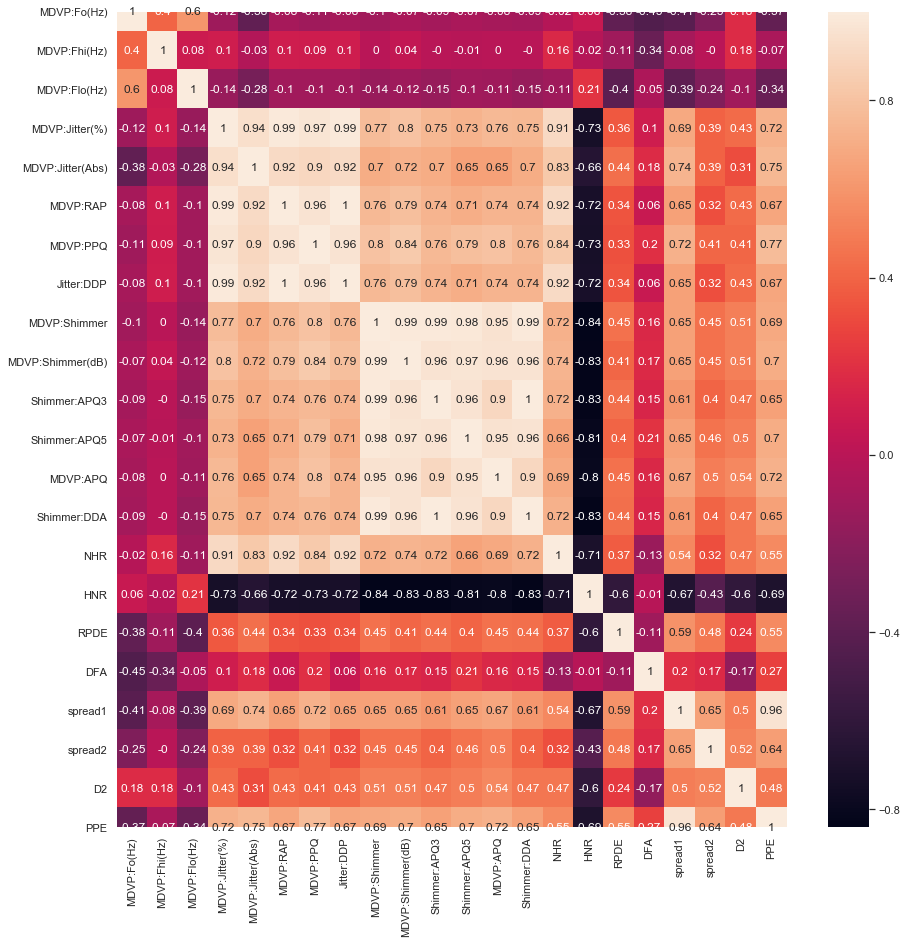

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'white') #white backgrond for seaborn plots
sns.set(style = 'whitegrid', color_codes = True)

plt.figure(figsize = (15,15))
corr = round(raw_df.drop('status', axis = 1).corr(),2)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True)

### The following blocks are highly correlated amongst each other so removing for multicollinearity   

1. MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
2. MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

In [6]:
correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.9:
            col = corr.columns[i]
            correlated_features.add(col)

correlated_features

{'Jitter:DDP',
 'MDVP:APQ',
 'MDVP:Jitter(Abs)',
 'MDVP:PPQ',
 'MDVP:RAP',
 'MDVP:Shimmer(dB)',
 'NHR',
 'PPE',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:DDA'}

Modified data set shape : (195, 12)
Duplicate rows in the data set : 0


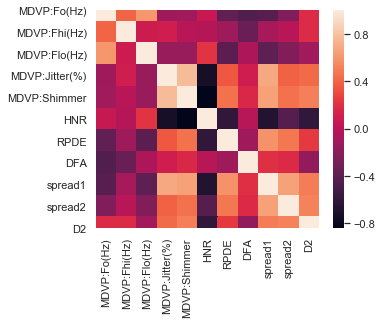

In [7]:
# Dropping name as well

mod_df = raw_df.drop(correlated_features, axis = 1)
mod_df.drop('name', axis = 1, inplace = True)

print(f'Modified data set shape : {mod_df.shape}')
print(f'Duplicate rows in the data set : {mod_df.duplicated().sum()}')


plt.figure(figsize = (5,4))
corr_m = round(mod_df.drop('status', axis = 1).corr(),2)
sns.heatmap(corr_m, xticklabels=corr_m.columns, yticklabels=corr_m.columns)

In [8]:
profile_m = mod_df.describe()
profile_m.loc['Null'] = mod_df.isnull().sum()
profile_m.loc['Skew'] = round(mod_df.skew(),4).to_list()
profile_m.loc['Kurtosis'] = round(mod_df.kurtosis(),4).to_list()
profile_m.transpose()

,count,mean,std,min,25%,50%,75%,max,Null,Skew,Kurtosis
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000,0.0,0.5917,-0.6279
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000,0.0,2.5421,7.6272
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000,0.0,1.2174,0.6546
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160,0.0,3.0849,12.0309
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080,0.0,1.6665,3.2383
HNR,195.0,21.885974,4.425764,8.441000,19.198000,22.085000,25.075500,33.047000,0.0,-0.5143,0.6160
status,195.0,0.753846,0.431878,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,-1.1877,-0.5955
RPDE,195.0,0.498536,0.103942,0.256570,0.421306,0.495954,0.587562,0.685151,0.0,-0.1434,-0.9218
DFA,195.0,0.718099,0.055336,0.574282,0.674758,0.722254,0.761881,0.825288,0.0,-0.0332,-0.6862
spread1,195.0,-5.684397,1.090208,-7.964984,-6.450096,-5.720868,-5.046192,-2.434031,0.0,0.4321,-0.0502


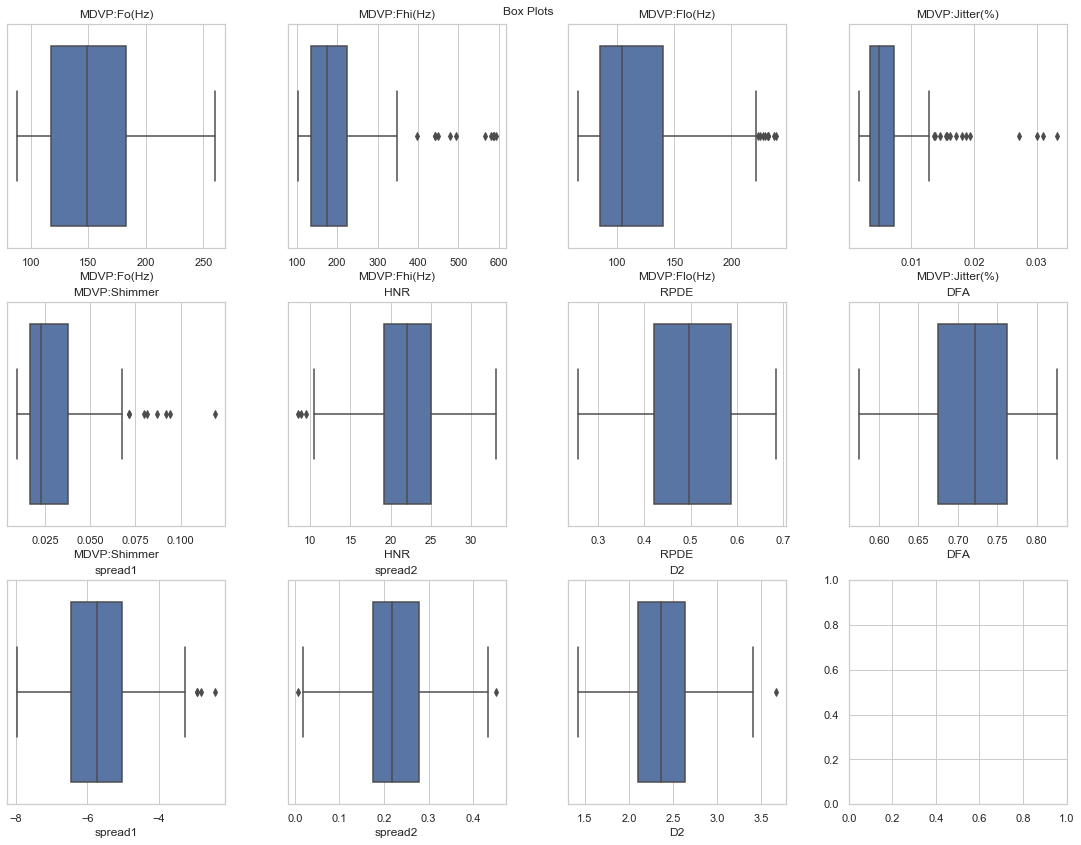

In [9]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, gridspec_kw={'width_ratios':[1,1,1,1]}, figsize=(16,12))
fig.suptitle('Box Plots')
fig.tight_layout(pad=3.0)

k = 0

for i in mod_df.drop('status', axis = 1).columns:
    r = k//4
    c = k%4
    ax[r,c].set_title(i, fontsize = 12)
    sns.boxplot(x=mod_df[i], orient = 'h', ax = ax[r,c])
    k = k+1

### Inferences

1. Outliers to be removed from the attributes  
2. The features are not very highly correlated anymore

In [10]:
# Checking for distribution of predicted feature - status

status_spread = mod_df.groupby('status').size().reset_index(name = 'Count')

for i in range(len(status_spread.index)):
    status_spread.loc[i,'Share'] = '{:.1%}'.format((status_spread.loc[i,'Count']/mod_df.shape[0]))
    
status_spread

,status,Count,Share
0,0,48,24.6%
1,1,147,75.4%


##### This data set is imbalanced, contains >75% rows as one type of the predicted value (Positive)

In [11]:
#Removing outliers from Mortgage : z-scores > 3 are considered outliers

from scipy import stats

print('Outlier : z>3 count\n')
for i in mod_df.drop('status', axis = 1).columns:
    mod_df['z'] = np.abs(stats.zscore(mod_df[i]))
    print({i}, mod_df[mod_df['z'] > 3].shape[0])
    mod_df = mod_df[mod_df['z'] <= 3]
    mod_df.drop('z', axis = 1)

mod_df.drop('z', axis = 1, inplace = True)
print(f'\nModified data set shape {mod_df.shape}')

Outlier : z>3 count

{'MDVP:Fo(Hz)'} 0
{'MDVP:Fhi(Hz)'} 7
{'MDVP:Flo(Hz)'} 0
{'MDVP:Jitter(%)'} 3
{'MDVP:Shimmer'} 2
{'HNR'} 0
{'RPDE'} 0
{'DFA'} 0
{'spread1'} 0
{'spread2'} 0
{'D2'} 1

Modified data set shape (182, 12)


In [12]:
status_spread = mod_df.groupby('status').size().reset_index(name = 'Count')

for i in range(len(status_spread.index)):
    status_spread.loc[i,'Share'] = '{:.1%}'.format((status_spread.loc[i,'Count']/mod_df.shape[0]))
    
status_spread

,status,Count,Share
0,0,46,25.3%
1,1,136,74.7%


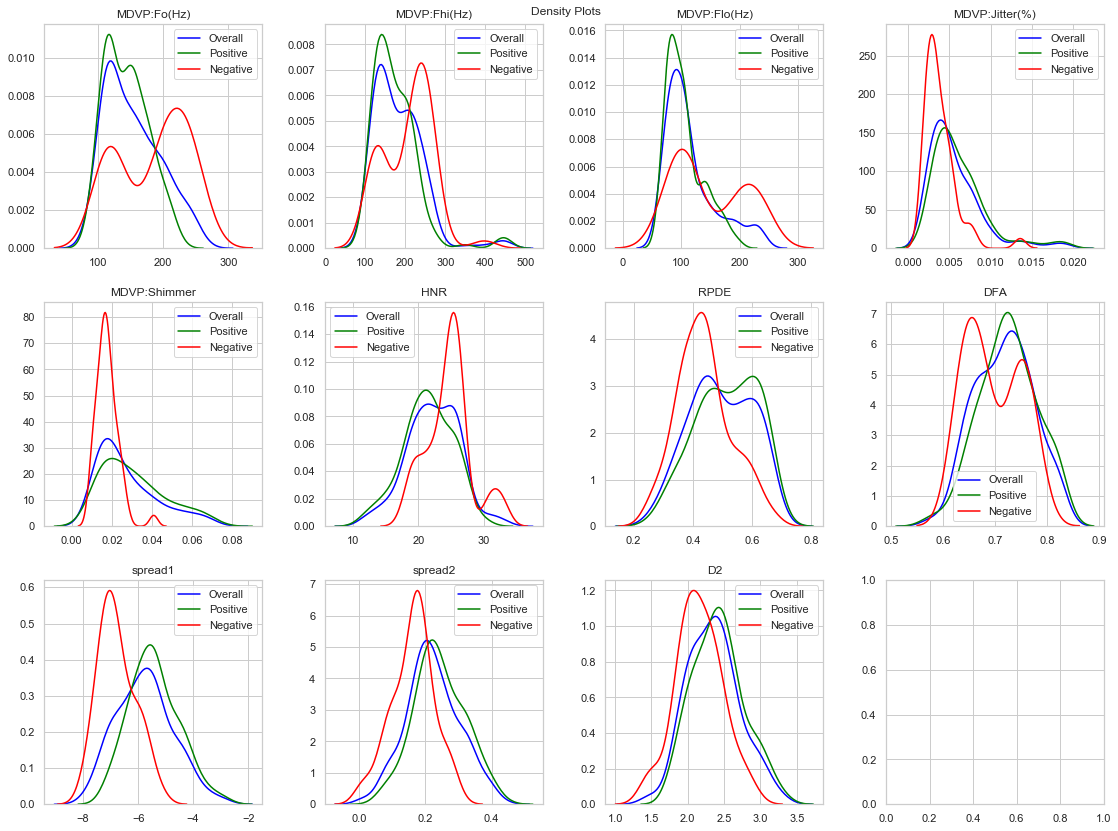

In [13]:
#Checking spread of each attribute against status 

fig, ax = plt.subplots(nrows = 3, ncols = 4, gridspec_kw={'width_ratios':[1,1,1,1]}, figsize=(16,12), sharey = False, sharex = False)
fig.suptitle('Density Plots')
fig.tight_layout(pad=3.0)

k = 0

for i in mod_df.drop('status', axis = 1).columns:
    r = k//4
    c = k%4
    ax[r,c].set_title(i, fontsize = 12)
    sns.kdeplot(mod_df[i], color = 'Blue', label = 'Overall', ax = ax[r,c])
    sns.kdeplot(mod_df[i][mod_df['status'] == 1], color = 'Green', label = 'Positive', ax = ax[r,c])
    sns.kdeplot(mod_df[i][mod_df['status'] == 0], color = 'Red', label = 'Negative', ax = ax[r,c])
    k = k+1

### Inferences

1. MDVP:Fo(Hz), MDVP:Fhi(Hz) - Patients > 200 are more likely to be not afflicted by Parkinsons    
2. MDVP:Flo(Hz) - Patients not afflicted have wider spread where as patients with this disease would have lower values
3. MDVP:Jitter(%) - Negative patients have lower value with postive patients slightly more spread out
4. MDVP:Shimmer - Negative patients have lower values, positive cases are spread out
5. HNR - Positive cases are spread out, negative cases have higher values and are concentrated
6. RPDE, spread1 - Positive cases are spread out, negative cases have lower values and are concentrated
7. DFA, spread2, D2 - Evenly spread for positive & negative cases

## Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc

In [14]:
#Scaling the data

from sklearn.preprocessing import MinMaxScaler

scld_df = mod_df

scaler = MinMaxScaler()

for i in scld_df.drop('status', axis = 1).columns:
    scld_df[[i]] = scaler.fit_transform(scld_df[[i]])

scld_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),182.0,0.384243,0.244542,0.0,0.169352,0.351006,0.551961,1.0
MDVP:Fhi(Hz),182.0,0.233270,0.174858,0.0,0.090312,0.183933,0.330793,1.0
MDVP:Flo(Hz),182.0,0.290243,0.252283,0.0,0.106583,0.220252,0.392871,1.0
MDVP:Jitter(%),182.0,0.222263,0.184427,0.0,0.097144,0.175339,0.302885,1.0
MDVP:Shimmer,182.0,0.293861,0.244608,0.0,0.111656,0.217229,0.433363,1.0
HNR,182.0,0.493311,0.186796,0.0,0.360055,0.492302,0.631249,1.0
status,182.0,0.747253,0.435786,0.0,0.250000,1.000000,1.000000,1.0
RPDE,182.0,0.557171,0.245246,0.0,0.375897,0.540869,0.765783,1.0
DFA,182.0,0.573341,0.220803,0.0,0.404861,0.589719,0.744004,1.0
spread1,182.0,0.438016,0.203573,0.0,0.293777,0.438599,0.551821,1.0


## Split the dataset into training and test set in the ratio of 70:30

In [15]:
from sklearn.model_selection import train_test_split

X = scld_df.drop('status', axis = 1)
y = scld_df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((127, 11), (55, 11), (127,), (55,))

## Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data

In [16]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter(action = 'ignore')

KNN Best Estimator 

 (KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform'),)

SVM Best Estimator 

 (SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),)

Classification Scores 
                    Model  Accuracy  Precision  Recall     F1  ROC_AUC
0     Logistic Regression     0.836      0.844    0.95  0.894    0.742
1             Naive Bayes     0.745      0.882    0.75  0.811    0.742
2        Nearest Neighors     0.945      0.974    0.95  0.962    0.942
3  Support Vector Machine     0.855      0.864    0.95  0.905    0.775 



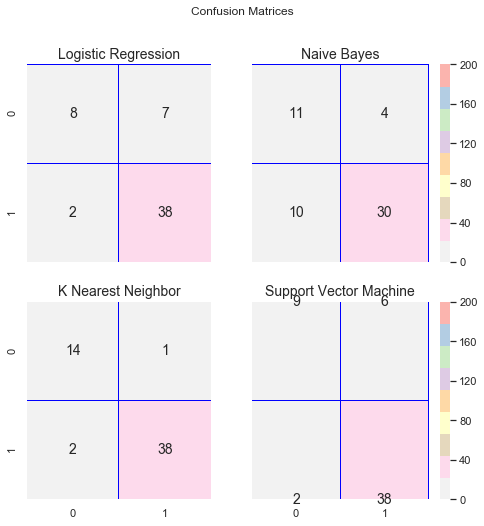

In [17]:
#Logistic Regression
logreg = LogisticRegression().fit(X_train,y_train.ravel())
logreg_pred = logreg.predict(X_test)

#Naive Bayes
GNB = GaussianNB().fit(X_train,y_train.ravel())
GNB_pred = GNB.predict(X_test)

#KNN

knn_param = {'n_neighbors': np.arange(3,10), 'p': [1,2]}

knn = GridSearchCV(KNeighborsClassifier(), knn_param, cv = 10)
knn.fit(X_train, y_train.ravel())
KNN_pred = knn.predict(X_test)
print(f'KNN Best Estimator \n\n {knn.best_estimator_,}\n')

#Support Vector Machine

svm_param = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

svm = GridSearchCV(SVC(),svm_param,refit=True)
svm.fit(X_train,y_train)
print(f'SVM Best Estimator \n\n {svm.best_estimator_,}\n')

SVM_pred = svm.predict(X_test)

fig, ax = plt.subplots(nrows = 2, ncols = 2, gridspec_kw={'width_ratios':[1,1.2]}, figsize=(8,8), sharey = True, sharex = True)
fig.suptitle('Confusion Matrices')

ax[0,0].set_title('Logistic Regression', fontsize = 14)
df_lr = pd.DataFrame(metrics.confusion_matrix(y_test,logreg_pred))
sns.heatmap(df_lr, cmap="Pastel1_r", annot=True,annot_kws={"size": 14}, fmt = 'd', cbar = False, linewidths = 0.1, linecolor = 'Blue',vmin = 0, vmax = 200, ax=ax[0,0])


ax[0,1].set_title('Naive Bayes', fontsize = 14)
df_GNB = pd.DataFrame(metrics.confusion_matrix(y_test,GNB_pred))
sns.heatmap(df_GNB, cmap="Pastel1_r", annot=True,annot_kws={"size": 14}, fmt = 'd', cbar = True, linewidths = 0.1, linecolor = 'Blue',vmin = 0, vmax = 200, ax = ax[0,1])


ax[1,0].set_title('K Nearest Neighbor', fontsize = 14)
df_KNN = pd.DataFrame(metrics.confusion_matrix(y_test,KNN_pred))
sns.heatmap(df_KNN, cmap="Pastel1_r", annot=True,annot_kws={"size": 14}, fmt = 'd', cbar = False, linewidths = 0.1, linecolor = 'Blue',vmin = 0, vmax = 200, ax = ax[1,0])


ax[1,1].set_title('Support Vector Machine', fontsize = 14)
df_SVM = pd.DataFrame(metrics.confusion_matrix(y_test,SVM_pred))
sns.heatmap(df_SVM, cmap="Pastel1_r", annot=True,annot_kws={"size": 14}, fmt = 'd', cbar = True, linewidths = 0.1, linecolor = 'Blue',vmin = 0, vmax = 200, ax = ax[1,1])


# printing the scores
scores = {'Model' : ['Logistic Regression', 'Naive Bayes', 'Nearest Neighors', 'Support Vector Machine'],
         'Accuracy' : [round(metrics.accuracy_score(y_test, logreg_pred),3),round(metrics.accuracy_score(y_test, GNB_pred),3),round(metrics.accuracy_score(y_test, KNN_pred),3),round(metrics.accuracy_score(y_test, SVM_pred),3)],
         'Precision' : [round(metrics.precision_score(y_test, logreg_pred),3),round(metrics.precision_score(y_test, GNB_pred),3),round(metrics.precision_score(y_test, KNN_pred),3),round(metrics.precision_score(y_test, SVM_pred),3)],
         'Recall' : [round(metrics.recall_score(y_test, logreg_pred),3),round(metrics.recall_score(y_test, GNB_pred),3),round(metrics.recall_score(y_test, KNN_pred),3),round(metrics.recall_score(y_test, SVM_pred),3)],
         'F1' : [round(metrics.f1_score(y_test, logreg_pred),3),round(metrics.f1_score(y_test, GNB_pred),3),round(metrics.f1_score(y_test, KNN_pred),3),round(metrics.f1_score(y_test, SVM_pred),3)],
         'ROC_AUC' : [round(metrics.roc_auc_score(y_test, logreg_pred),3),round(metrics.roc_auc_score(y_test, GNB_pred),3),round(metrics.roc_auc_score(y_test, KNN_pred),3),round(metrics.roc_auc_score(y_test, SVM_pred),3)]}


scores_df = pd.DataFrame(scores,columns = ['Model','Accuracy','Precision','Recall','F1', 'ROC_AUC'])

print(f'Classification Scores \n{scores_df} \n')

Best Criterion: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.05, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 1, 'splitter': 'best'}
Confusion Matrix :

 [[ 8  7]
 [ 3 37]]

Accuracy : 0.818
Precision : 0.841
Recall : 0.925
F1 : 0.881
ROC_AUC : 0.729



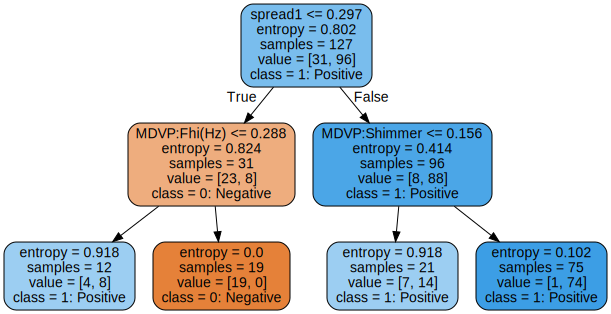

In [19]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import display
import graphviz

dTree_param = {'max_depth': [2,3,4,5],  'min_impurity_decrease': [0.05,0.1,0.15], 'criterion' : ['gini', 'entropy'], 'random_state': [1]}

dTree = GridSearchCV(DecisionTreeClassifier(),dTree_param)
dTree.fit(X_train,y_train)
dTree_pred = dTree.predict(X_test)
print('Best Criterion:', dTree.best_estimator_.get_params())

print(f'''Confusion Matrix :\n\n {metrics.confusion_matrix(y_test, dTree_pred)}\n
Accuracy : {round(metrics.accuracy_score(y_test, dTree_pred),3)}
Precision : {round(metrics.precision_score(y_test, dTree_pred),3)}
Recall : {round(metrics.recall_score(y_test, dTree_pred),3)}
F1 : {round(metrics.f1_score(y_test, dTree_pred),3)}
ROC_AUC : {round(metrics.roc_auc_score(y_test, dTree_pred),3)}
''')


fn=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Shimmer', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2','D2']
cn=['0: Negative', '1: Positive']
dot_data = tree.export_graphviz(dTree.best_estimator_,
                                out_file = None,
                                rounded = True,
                                feature_names = fn, 
                                class_names=cn,
                                filled = True)

display(graphviz.Source(dot_data))

In [20]:
# Feature importance

dTree_fi = pd.DataFrame(dTree.best_estimator_.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by ='Imp' , ascending=False)
print(dTree_fi[dTree_fi['Imp'] > 0])

                   Imp
spread1       0.572524
MDVP:Fhi(Hz)  0.227348
MDVP:Shimmer  0.200128


## Train a meta-classifier and note the accuracy on test data

Classification Scores 
         Model  Accuracy  Precision  Recall     F1  ROC_AUC
0  Hard Voting     0.836      0.844    0.95  0.894    0.742
1  Soft Voting     0.836      0.844    0.95  0.894    0.742 



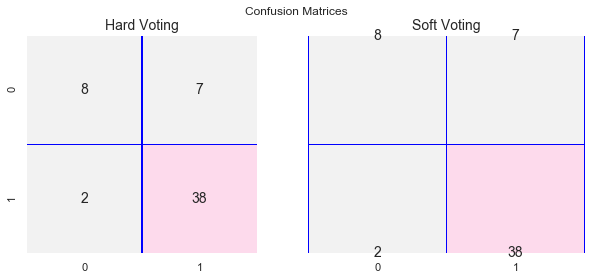

In [21]:
from sklearn.ensemble import VotingClassifier

estimator = [('LR',logreg),('GNB',GNB),('KNN',knn),('SVM',svm),('Tree',dTree.best_estimator_)]

vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(X_train, y_train) 
vot_hard_pred = vot_hard.predict(X_test) 

vot_soft = VotingClassifier(estimators = estimator, voting ='soft') 
vot_soft.fit(X_train, y_train) 
vot_soft_pred = vot_hard.predict(X_test) 



fig, ax = plt.subplots(nrows = 1, ncols = 2, gridspec_kw={'width_ratios':[1,1.2]}, figsize=(10,4), sharey = True)
fig.suptitle('Confusion Matrices')

ax[0].set_title('Hard Voting', fontsize = 14)
df_vh = pd.DataFrame(metrics.confusion_matrix(y_test,vot_hard_pred))
sns.heatmap(df_vh, cmap="Pastel1_r", annot=True,annot_kws={"size": 14}, fmt = 'd', cbar = False, linewidths = 0.1, linecolor = 'Blue',vmin = 0, vmax = 200, ax=ax[0])


ax[1].set_title('Soft Voting', fontsize = 14)
df_vs = pd.DataFrame(metrics.confusion_matrix(y_test,vot_soft_pred))
sns.heatmap(df_vs, cmap="Pastel1_r", annot=True,annot_kws={"size": 14}, fmt = 'd', cbar = False, linewidths = 0.1, linecolor = 'Blue',vmin = 0, vmax = 200, ax=ax[1])


# printing the scores
v_scores = {'Model' : ['Hard Voting', 'Soft Voting'],
         'Accuracy' : [round(metrics.accuracy_score(y_test, vot_hard_pred),3),round(metrics.accuracy_score(y_test, vot_soft_pred),3)],
         'Precision' : [round(metrics.precision_score(y_test, vot_hard_pred),3),round(metrics.precision_score(y_test, vot_soft_pred),3)],
         'Recall' : [round(metrics.recall_score(y_test, vot_hard_pred),3),round(metrics.recall_score(y_test, vot_soft_pred),3)],
         'F1' : [round(metrics.f1_score(y_test, vot_hard_pred),3),round(metrics.f1_score(y_test, vot_soft_pred),3)],
         'ROC_AUC' : [round(metrics.roc_auc_score(y_test, vot_hard_pred),3),round(metrics.roc_auc_score(y_test, vot_soft_pred),3)]}

scores_vdf = pd.DataFrame(v_scores,columns = ['Model','Accuracy','Precision','Recall','F1','ROC_AUC'])

print(f'Classification Scores \n{scores_vdf} \n')


## Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy

Best Criterion: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Classification Scores 
           Model  Accuracy  Precision  Recall     F1  ROC_AUC
0  Random Rorest     0.818      0.875   0.875  0.875    0.771
1        Bagging     0.836      0.878   0.900  0.889    0.783
2       AdaBoost     0.782      0.850   0.850  0.850    0.725
3  GradientBoost     0.818      0.895   0.850  0.872    0.792 



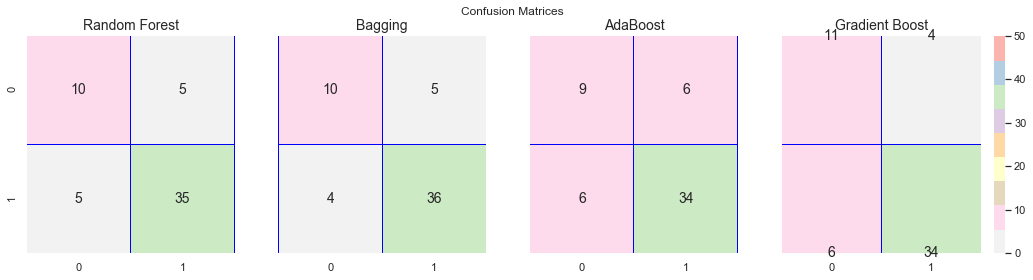

In [22]:
#Standard Ensemble techniques : Random Forest, Bagging & Boosting

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

rf_param = {'n_estimators': (5,10,20,30,40,50,100), 'max_features':(3,4,5,6)}

rf = GridSearchCV(RandomForestClassifier(),rf_param)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print('Best Criterion:', rf.best_estimator_.get_params())

bag = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators = 50, random_state = 10)
bag.fit(X_train, y_train)
bag_pred =bag.predict(X_test)

ada = AdaBoostClassifier(n_estimators = 200, random_state = 10)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

GB = GradientBoostingClassifier(n_estimators = 200, random_state = 10)
GB.fit(X_train, y_train)
GB_pred = GB.predict(X_test)



fig, ax = plt.subplots(nrows = 1, ncols = 4, gridspec_kw={'width_ratios':[1,1,1,1.2]}, figsize=(18,4), sharey = True)
fig.suptitle('Confusion Matrices')

ax[0].set_title('Random Forest', fontsize = 14)
df_rf = pd.DataFrame(metrics.confusion_matrix(y_test,rf_pred))
sns.heatmap(df_rf, cmap="Pastel1_r", annot=True,annot_kws={"size": 14}, fmt = 'd', cbar = False, linewidths = 0.1, linecolor = 'Blue',vmin = 0, vmax = 50, ax=ax[0])


ax[1].set_title('Bagging', fontsize = 14)
df_bag = pd.DataFrame(metrics.confusion_matrix(y_test,bag_pred))
sns.heatmap(df_bag, cmap="Pastel1_r", annot=True,annot_kws={"size": 14}, fmt = 'd', cbar = False, linewidths = 0.1, linecolor = 'Blue',vmin = 0, vmax = 50, ax = ax[1])


ax[2].set_title('AdaBoost', fontsize = 14)
df_ada = pd.DataFrame(metrics.confusion_matrix(y_test,ada_pred))
sns.heatmap(df_ada, cmap="Pastel1_r", annot=True,annot_kws={"size": 14}, fmt = 'd', cbar = False, linewidths = 0.1, linecolor = 'Blue',vmin = 0, vmax = 50, ax = ax[2])


ax[3].set_title('Gradient Boost', fontsize = 14)
df_GB = pd.DataFrame(metrics.confusion_matrix(y_test,GB_pred))
sns.heatmap(df_GB, cmap="Pastel1_r", annot=True,annot_kws={"size": 14}, fmt = 'd', cbar = True, linewidths = 0.1, linecolor = 'Blue',vmin = 0, vmax = 50, ax = ax[3])


# printing the scores
e_scores = {'Model' : ['Random Rorest', 'Bagging', 'AdaBoost', 'GradientBoost'],
         'Accuracy' : [round(metrics.accuracy_score(y_test, rf_pred),3),round(metrics.accuracy_score(y_test, bag_pred),3),round(metrics.accuracy_score(y_test, ada_pred),3),round(metrics.accuracy_score(y_test, GB_pred),3)],
         'Precision' : [round(metrics.precision_score(y_test, rf_pred),3),round(metrics.precision_score(y_test, bag_pred),3),round(metrics.precision_score(y_test, ada_pred),3),round(metrics.precision_score(y_test, GB_pred),3)],
         'Recall' : [round(metrics.recall_score(y_test, rf_pred),3),round(metrics.recall_score(y_test, bag_pred),3),round(metrics.recall_score(y_test, ada_pred),3),round(metrics.recall_score(y_test, GB_pred),3)],
         'F1' : [round(metrics.f1_score(y_test, rf_pred),3),round(metrics.f1_score(y_test, bag_pred),3),round(metrics.f1_score(y_test, ada_pred),3),round(metrics.f1_score(y_test, GB_pred),3)],
         'ROC_AUC' : [round(metrics.roc_auc_score(y_test, rf_pred),3),round(metrics.roc_auc_score(y_test, bag_pred),3),round(metrics.roc_auc_score(y_test, ada_pred),3),round(metrics.roc_auc_score(y_test, GB_pred),3)]}


e_scores_df = pd.DataFrame(e_scores,columns = ['Model','Accuracy','Precision','Recall','F1', 'ROC_AUC'])

print(f'\nClassification Scores \n{e_scores_df} \n')

## Compare all the models (minimum 5) and pick the best one among them

In [23]:
#Comparing & selecting the best model : K-folds Cross Validation

from sklearn.model_selection import cross_val_score


cvs = {'Metric':['Mean','Std Deviation'],
       'LogR' : [round(cross_val_score(logreg, X, y, cv = 10).mean(),3),round(cross_val_score(logreg, X, y, cv = 10).std(),3)],
       'GNB' : [round(cross_val_score(GNB, X, y, cv = 10).mean(),3),round(cross_val_score(GNB,  X, y, cv = 10).std(),3)],
       'KNN' : [round(cross_val_score(knn, X, y, cv = 10).mean(),3),round(cross_val_score(knn,  X, y, cv = 10).std(),3)],
       'SVM' : [round(cross_val_score(svm, X, y, cv = 10).mean(),3),round(cross_val_score(svm,  X, y, cv = 10).std(),3)],
       'Dtree' : [round(cross_val_score(dTree, X, y, cv = 10).mean(),3),round(cross_val_score(dTree,  X, y, cv = 10).std(),3)],
       'RF' : [round(cross_val_score(rf, X, y, cv = 10).mean(),3),round(cross_val_score(rf,  X, y, cv = 10).std(),3)],
       'Bag' : [round(cross_val_score(bag, X, y, cv = 10).mean(),3),round(cross_val_score(bag,  X, y, cv = 10).std(),3)],
       'Ada' : [round(cross_val_score(ada, X, y, cv = 10).mean(),3),round(cross_val_score(ada,  X, y, cv = 10).std(),3)],
       'GB' : [round(cross_val_score(GB, X, y, cv = 10).mean(),3),round(cross_val_score(GB,  X, y, cv = 10).std(),3)]}

cvs_df = pd.DataFrame(cvs,columns = ['Metric','LogR','GNB','KNN','SVM','Dtree','RF','Bag','Ada','GB'])

print(f'\nCross Validation Scores \n{cvs_df} \n')


Cross Validation Scores 
          Metric   LogR    GNB    KNN    SVM  Dtree     RF    Bag    Ada  \
0           Mean  0.832  0.715  0.860  0.782  0.780  0.865  0.801  0.786   
1  Std Deviation  0.116  0.196  0.113  0.123  0.114  0.088  0.115  0.147   

      GB  
0  0.831  
1  0.113   



### Random Forest can be considered as the best model as it has the highest mean cross validation score and lowest standard deviation 